# Analysis and Evaluation of Classification Models

This notebook aims to explore and compare the performance of different machine learning models for a classification problem. The main objectives are:

1.  **Evaluate baseline models:** Analyze the performance of classifiers such as **Logistic Regression**, **Random Forest**, and **XGBoost** using the entire feature set.
2.  **Perform feature selection:** Identify and use the 10 most relevant features to retrain the models, with the goal of improving efficiency and performance.
3.  **Optimize parameters:** Find the best hyperparameters for each model using optimization techniques.
4.  **Build and evaluate an ensemble:** Combine the optimized models into a **VotingClassifier** to leverage the collective strength of different algorithms and achieve more robust results.

Each section of the notebook is dedicated to a specific model, with charts and reports that document the different evaluation phases.

## 1) Setup and initialization

In [8]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message="pkg_resources is deprecated as an API"
)

In [4]:
%load_ext autoreload
%autoreload 2

from libraries.embeddings_utils import *
import ipynbname
from scipy.stats import randint
from sklearn.ensemble import VotingClassifier
from libraries.classifier_utils import *
from libraries.file_manager_utils import *
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform

project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_fd = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_pe = f"{project_dir}/models/1.pe_weights/best.pt"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
emb_builder = EmbeddingBuilder(model_path, image_dataset_path, "load",weights_path_pe=model_path_pe)
embeddings = emb_builder.create_embedding(flags=True,positions=True, positions_normalized=True, geometric_info=True,k_positions_normalized=True ,k_geometric_info=True)


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /Users/lorenzodimaio/Download/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------

Embedding creation-----------------------------------------------------------

In [6]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)

# 2) Logistic Regression

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


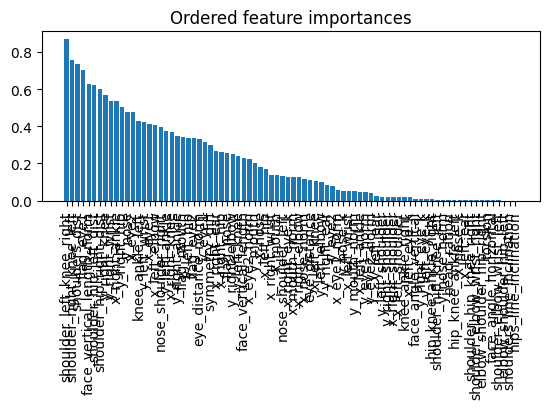

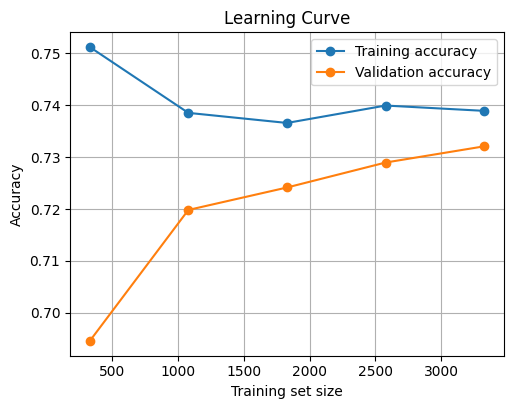


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.78      0.70      0.74       437
 baby_unsafe       0.70      0.78      0.74       395

    accuracy                           0.74       832
   macro avg       0.74      0.74      0.74       832
weighted avg       0.74      0.74      0.74       832

Confusion matrix---------------------------------------


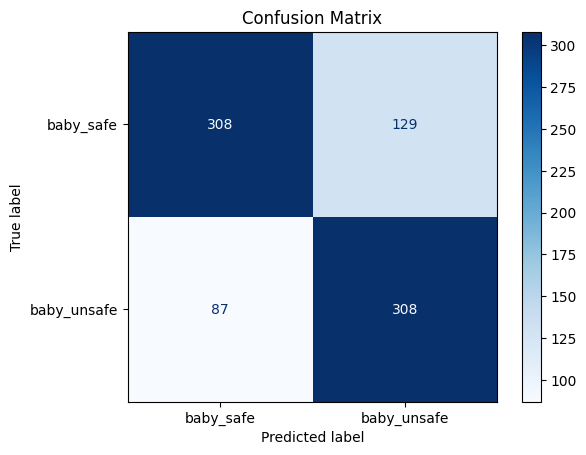

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


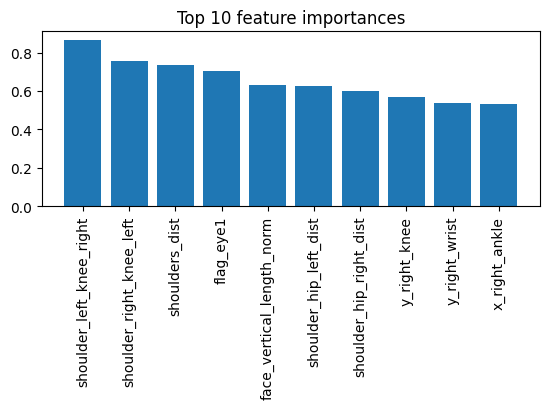

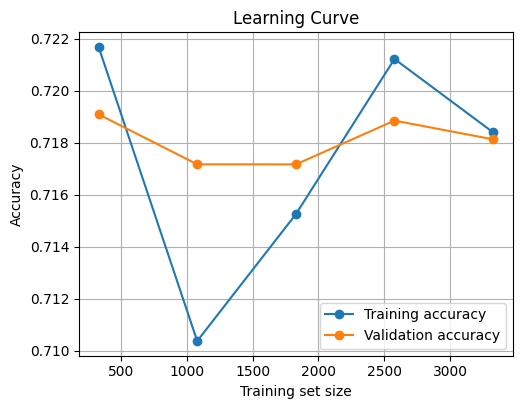


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.78      0.66      0.72       437
 baby_unsafe       0.68      0.79      0.73       395

    accuracy                           0.72       832
   macro avg       0.73      0.73      0.72       832
weighted avg       0.73      0.72      0.72       832

Confusion matrix---------------------------------------


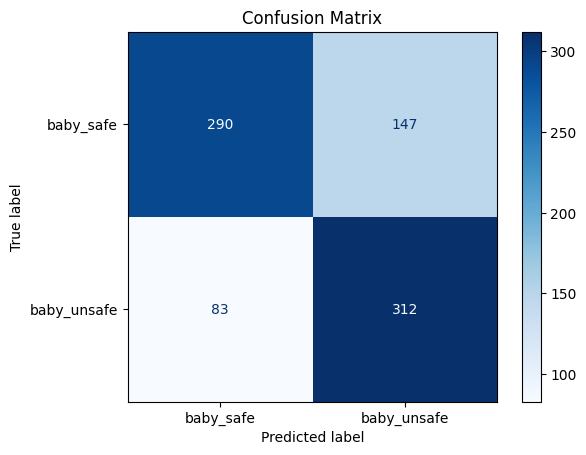

In [9]:
lr_1, results_lr_1 = clf.logistic_regression(verbose=True)

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(



Start random search...


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was r


Random Search Results:
Best parameters found:  {'C': np.float64(592.9735077555503), 'l1_ratio': 0.9, 'penalty': 'l1', 'solver': 'liblinear'}
Best mean cross-validation accuracy:  0.760372101424733


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

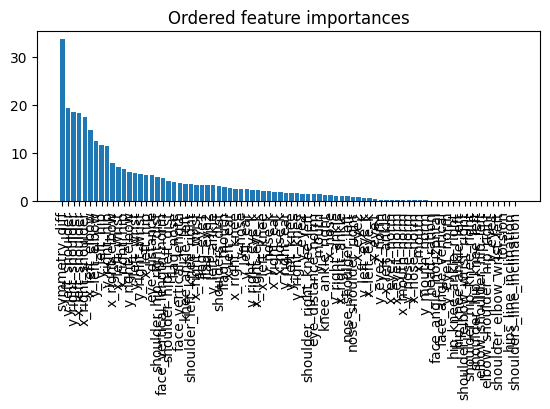

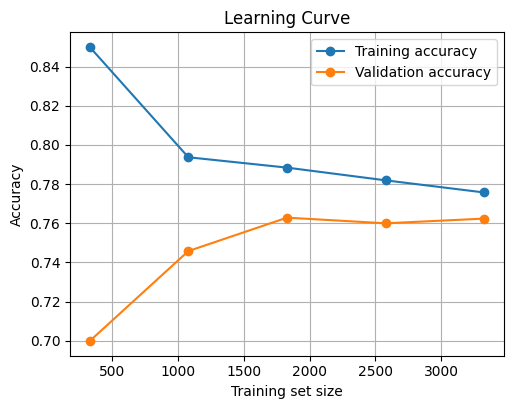


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.82      0.72      0.77       437
 baby_unsafe       0.73      0.83      0.77       395

    accuracy                           0.77       832
   macro avg       0.77      0.77      0.77       832
weighted avg       0.78      0.77      0.77       832

Confusion matrix---------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


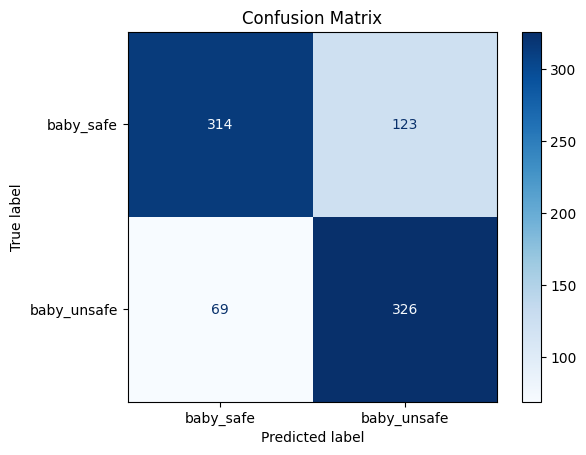

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


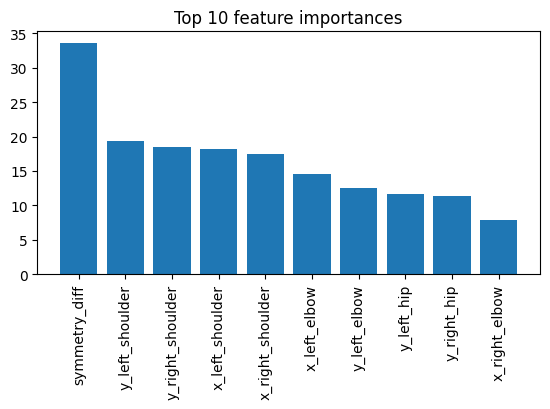

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

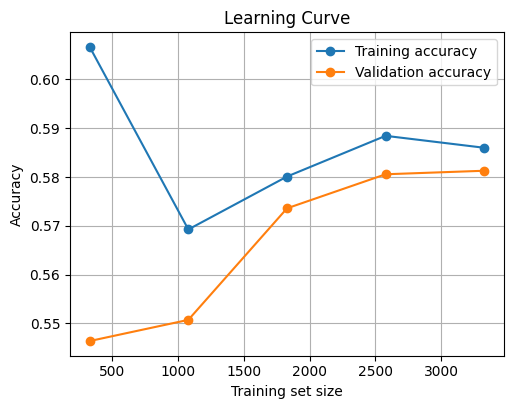

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.60      0.69      0.64       437
 baby_unsafe       0.59      0.50      0.54       395

    accuracy                           0.60       832
   macro avg       0.59      0.59      0.59       832
weighted avg       0.60      0.60      0.59       832

Confusion matrix---------------------------------------


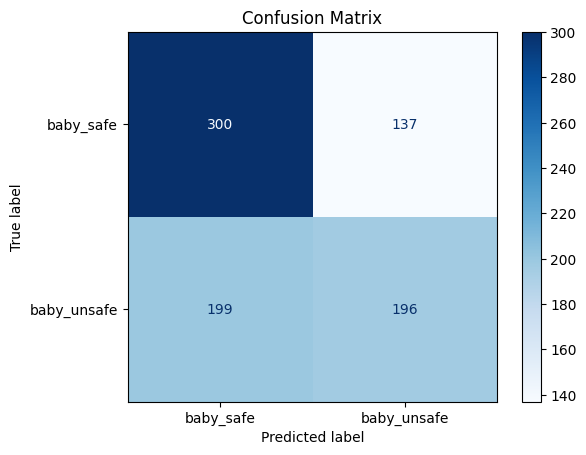

In [5]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': loguniform(0.001, 1000),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.1, 0.5, 0.9] # Usato solo con penalty='elasticnet'
}

best_params = clf.optimize_model(lr_1, param_grid,verbose=False)
lr_2 = LogisticRegression(**best_params)
results_lr_2 = clf.evaluation_pipeline(lr_2,verbose=True)

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/util

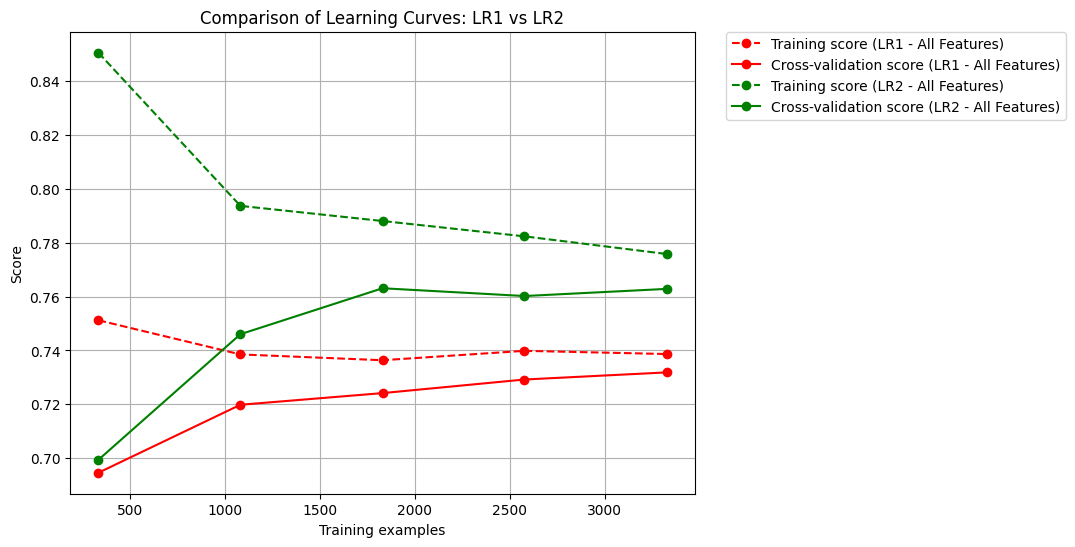

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/util

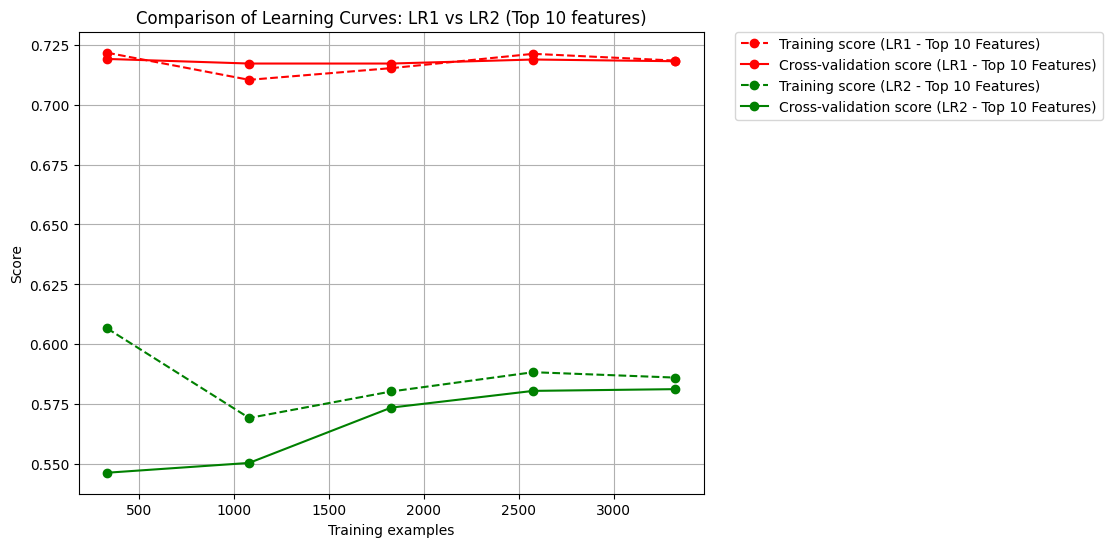

In [6]:
# Graph 1:
data_to_plot_1 = [
    (results_lr_1['all_features']['model'], "LR1 - All Features", results_lr_1['all_features']['X'], results_lr_1['all_features']['y']),
    (results_lr_2['all_features']['model'], "LR2 - All Features", results_lr_2['all_features']['X'], results_lr_2['all_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_1,
    title="Comparison of Learning Curves: LR1 vs LR2"
)

# Graph 2:
data_to_plot_2 = [
    (results_lr_1['top_10_features']['model'], "LR1 - Top 10 Features", results_lr_1['top_10_features']['X'], results_lr_1['top_10_features']['y']),
    (results_lr_2['top_10_features']['model'], "LR2 - Top 10 Features", results_lr_2['top_10_features']['X'], results_lr_2['top_10_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_2,
    title="Comparison of Learning Curves: LR1 vs LR2 (Top 10 features)"
)

# 3) Random Forest


------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


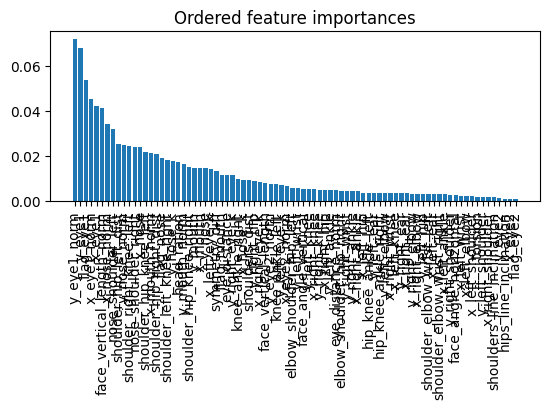

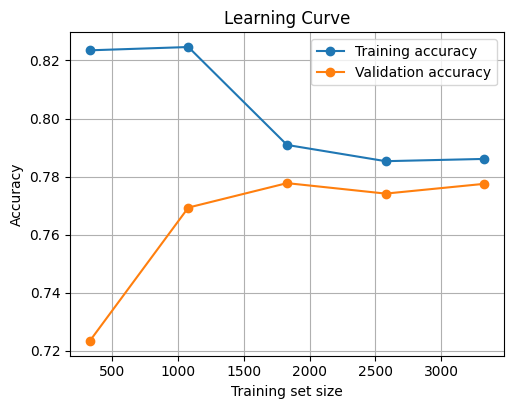


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.68      0.77       437
 baby_unsafe       0.72      0.89      0.79       395

    accuracy                           0.78       832
   macro avg       0.79      0.79      0.78       832
weighted avg       0.80      0.78      0.78       832

Confusion matrix---------------------------------------


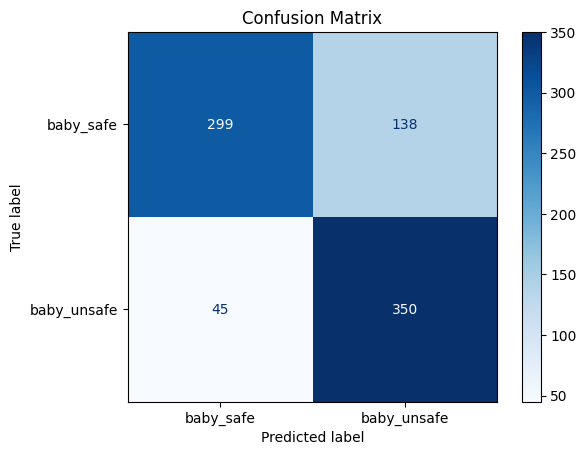

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


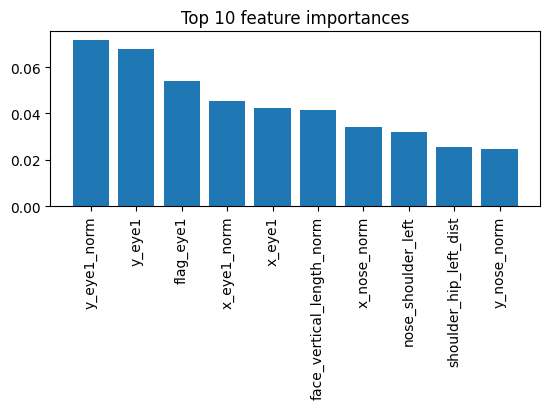

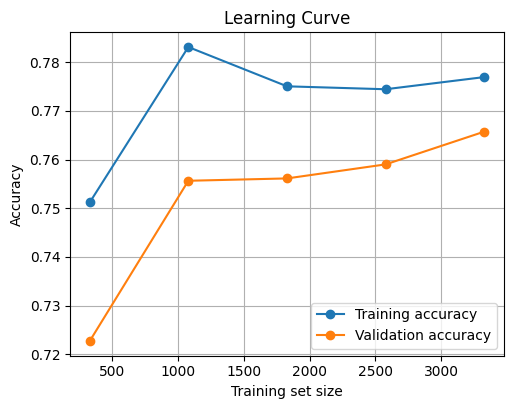


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.85      0.68      0.76       437
 baby_unsafe       0.71      0.87      0.78       395

    accuracy                           0.77       832
   macro avg       0.78      0.77      0.77       832
weighted avg       0.78      0.77      0.77       832

Confusion matrix---------------------------------------


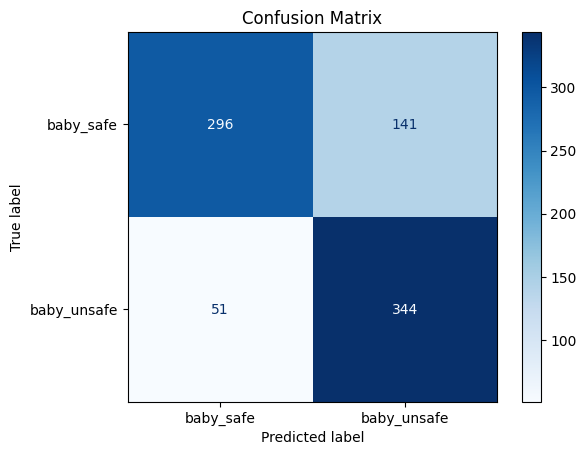

In [7]:
random_forest_1, results_rf1 = clf.random_forest(verbose=True)


Start random search...


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
515 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
515 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 430, in fit


Random Search Results:
Best parameters found:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 0.5, 'max_samples': np.float64(0.8473924665198522), 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 995}
Best mean cross-validation accuracy:  0.8704152272573324
------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


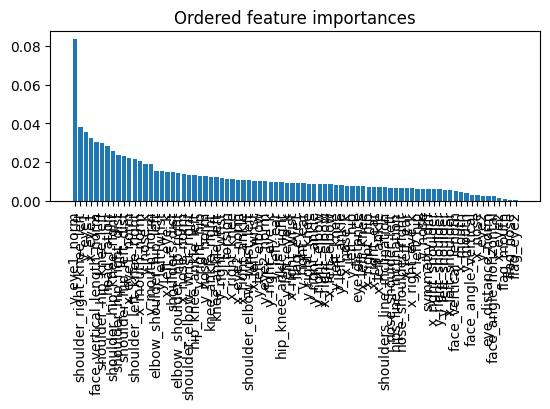

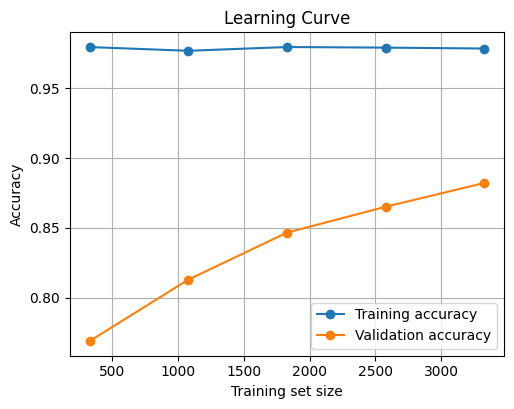


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.93      0.86      0.89       437
 baby_unsafe       0.86      0.93      0.89       395

    accuracy                           0.89       832
   macro avg       0.89      0.89      0.89       832
weighted avg       0.90      0.89      0.89       832

Confusion matrix---------------------------------------


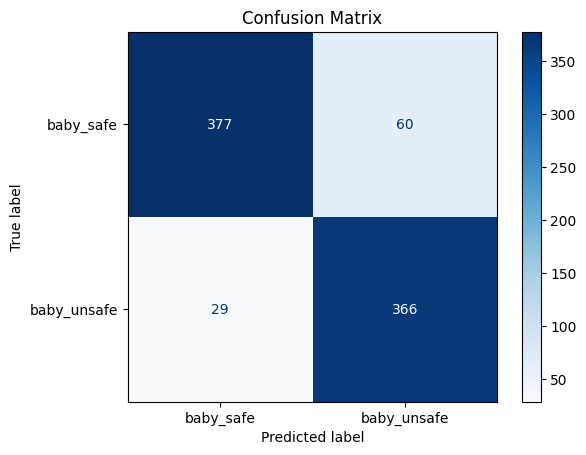

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


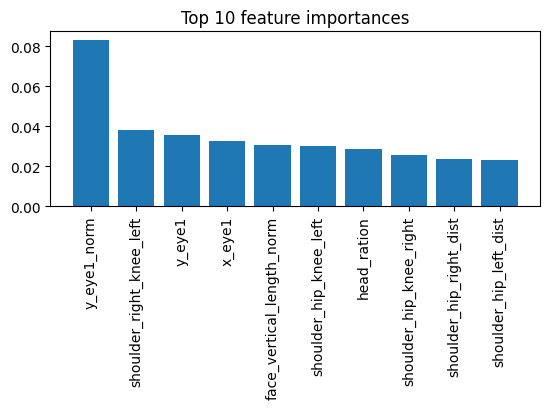

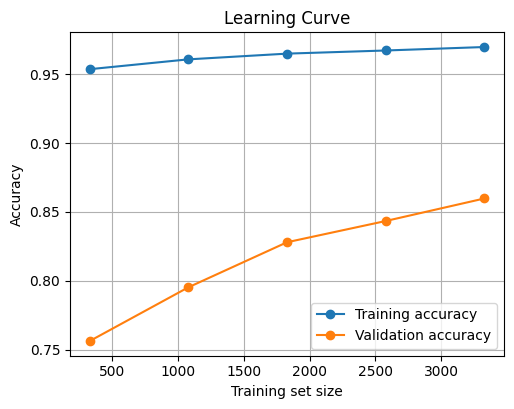


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.91      0.82      0.86       437
 baby_unsafe       0.82      0.91      0.86       395

    accuracy                           0.86       832
   macro avg       0.86      0.86      0.86       832
weighted avg       0.87      0.86      0.86       832

Confusion matrix---------------------------------------


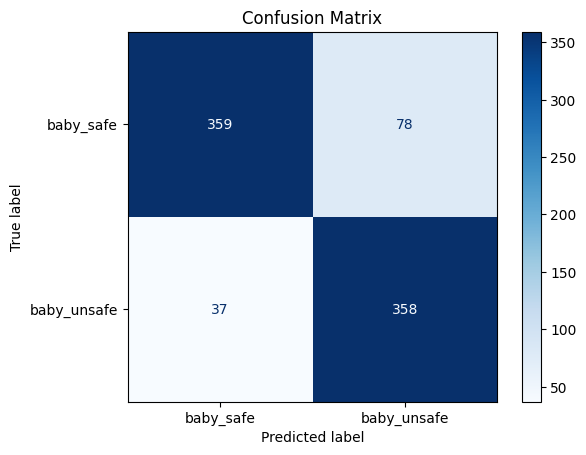

In [8]:
param_dist = {
        'n_estimators': randint(200, 1000), # Random number between 100 and 500
        'max_depth': randint(5, 50),     # Random number between 5 and 20
        'min_samples_split': randint(2, 40),
        'min_samples_leaf': randint(1, 25),
        'max_features': ['sqrt', 'log2', 0.5, 0.7, 0.9, None],
        'criterion': ['gini', 'entropy'],
        'max_samples': uniform(0.5, 0.5),
        'bootstrap': [True, False]
}

best_params = clf.optimize_model(random_forest_1, param_dist,verbose=False)
random_forest_2 = RandomForestClassifier(**best_params)
results_rf2 = clf.evaluation_pipeline(random_forest_2,verbose=True)

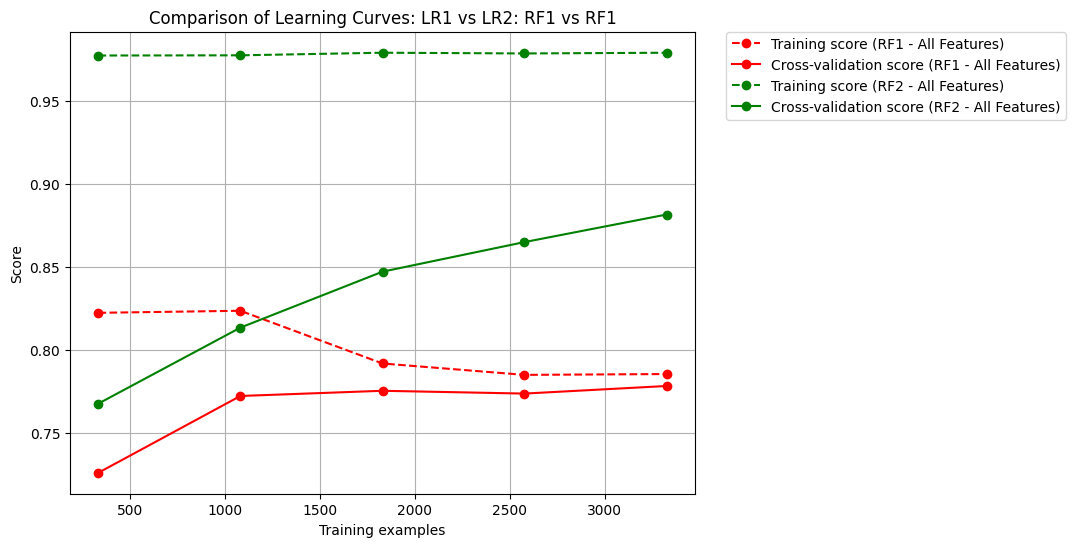

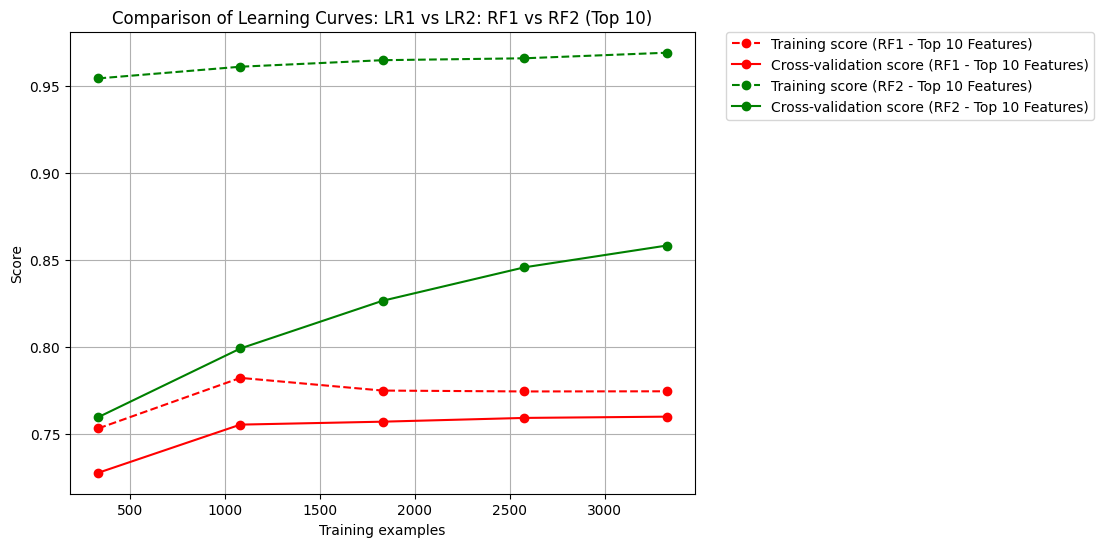

In [9]:
# Graph 1:
data_to_plot_1 = [
    (results_rf1['all_features']['model'], "RF1 - All Features", results_rf1['all_features']['X'], results_rf1['all_features']['y']),
    (results_rf2['all_features']['model'], "RF2 - All Features", results_rf2['all_features']['X'], results_rf2['all_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_1,
    title="Comparison of Learning Curves: LR1 vs LR2: RF1 vs RF1"
)

# Graph 2:
data_to_plot_2 = [
    (results_rf1['top_10_features']['model'], "RF1 - Top 10 Features", results_rf1['top_10_features']['X'], results_rf1['top_10_features']['y']),
    (results_rf2['top_10_features']['model'], "RF2 - Top 10 Features", results_rf2['top_10_features']['X'], results_rf2['top_10_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_2,
    title="Comparison of Learning Curves: LR1 vs LR2: RF1 vs RF2 (Top 10)"
)

# 4) XGBC

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


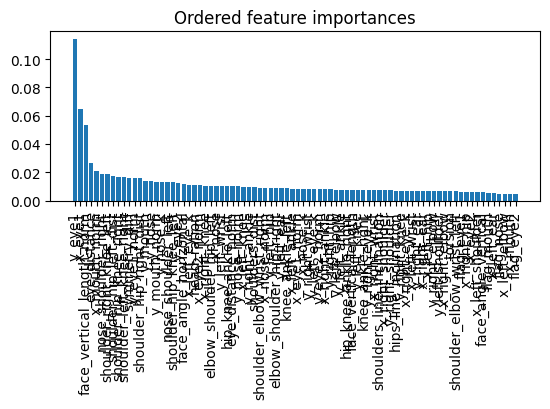

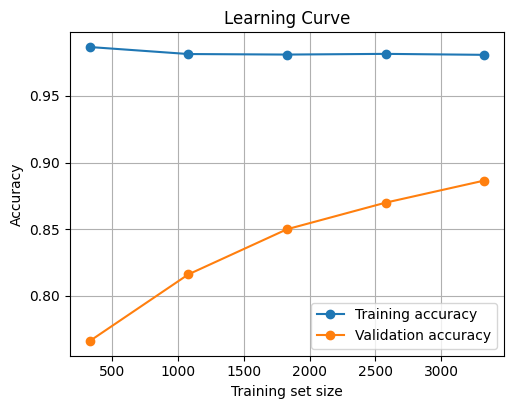


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.92      0.87      0.90       437
 baby_unsafe       0.86      0.92      0.89       395

    accuracy                           0.89       832
   macro avg       0.89      0.89      0.89       832
weighted avg       0.89      0.89      0.89       832

Confusion matrix---------------------------------------


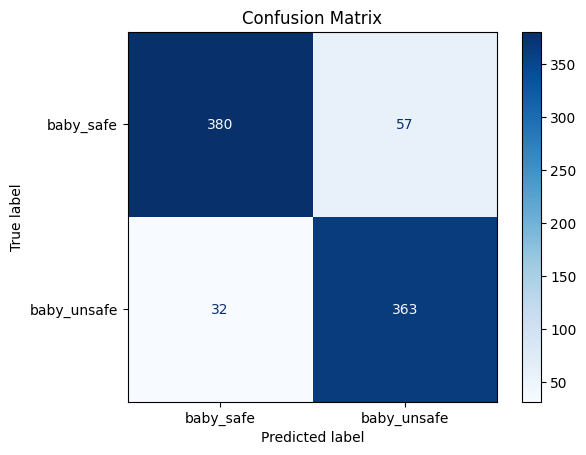

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


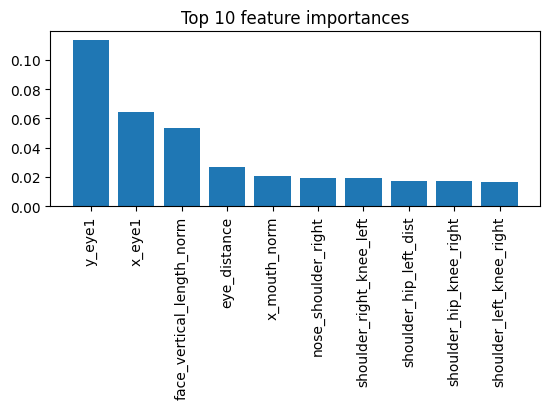

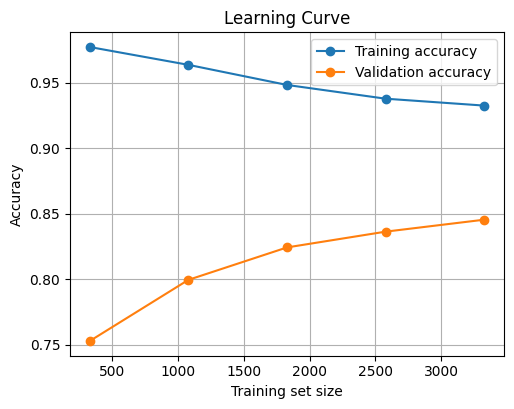


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.89      0.81      0.85       437
 baby_unsafe       0.81      0.89      0.85       395

    accuracy                           0.85       832
   macro avg       0.85      0.85      0.85       832
weighted avg       0.85      0.85      0.85       832

Confusion matrix---------------------------------------


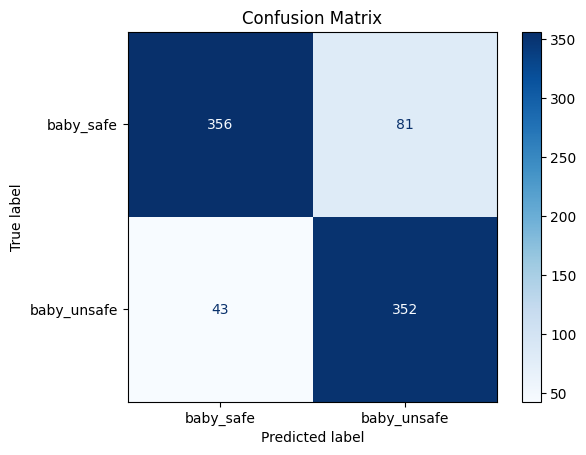

In [10]:
xgbc_1, results_xgbc_1 = clf.XGBC(verbose=True)


Start random search...

Random Search Results:
Best parameters found:  {'colsample_bytree': np.float64(0.9193380499938204), 'gamma': np.float64(0.07535877198271473), 'learning_rate': np.float64(0.1624596330222156), 'max_depth': 7, 'n_estimators': 358, 'subsample': np.float64(0.8363571772752967)}
Best mean cross-validation accuracy:  0.8821413895098106
------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


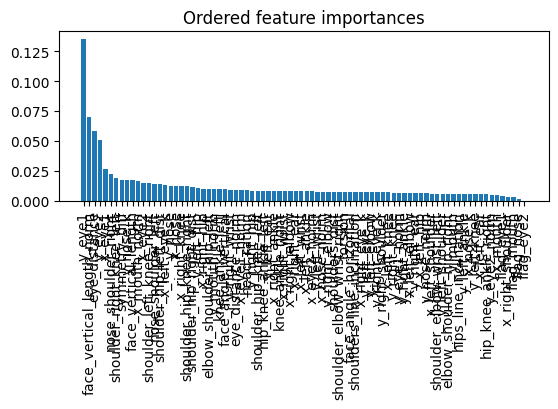

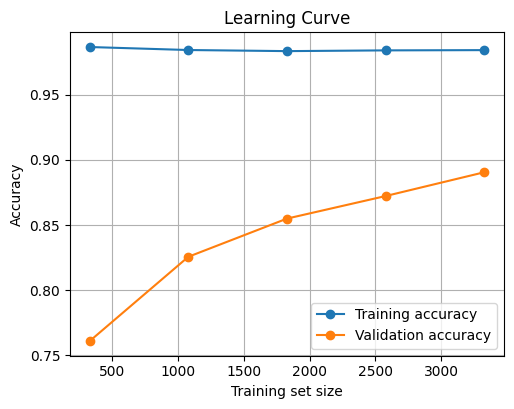


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.93      0.88      0.90       437
 baby_unsafe       0.88      0.92      0.90       395

    accuracy                           0.90       832
   macro avg       0.90      0.90      0.90       832
weighted avg       0.90      0.90      0.90       832

Confusion matrix---------------------------------------


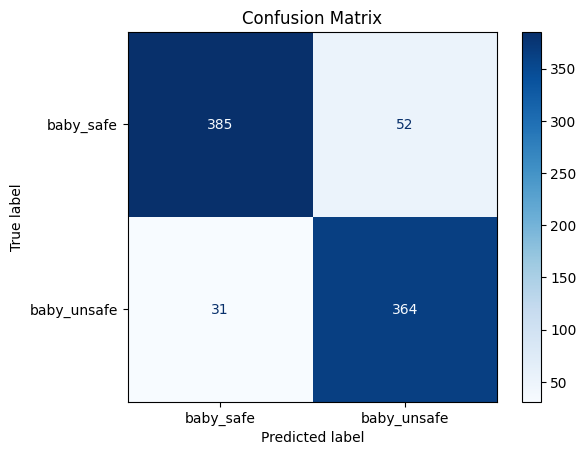

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


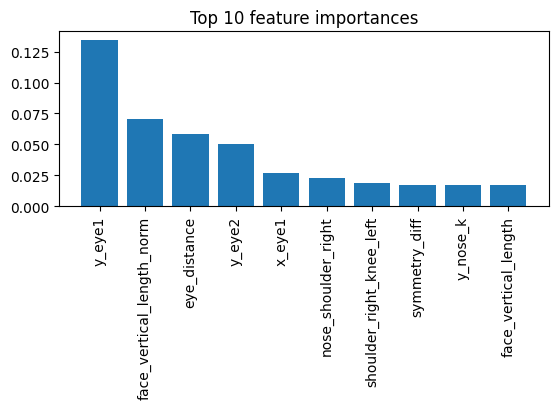

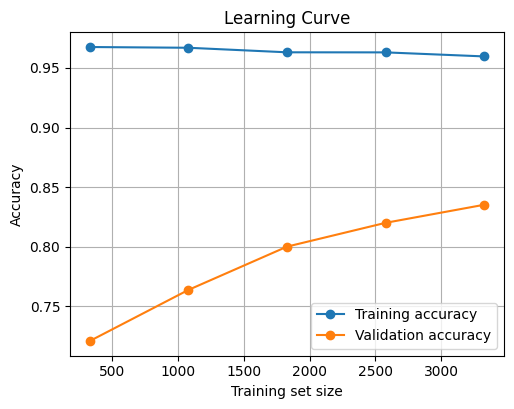


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.82      0.85       437
 baby_unsafe       0.82      0.88      0.85       395

    accuracy                           0.85       832
   macro avg       0.85      0.85      0.85       832
weighted avg       0.85      0.85      0.85       832

Confusion matrix---------------------------------------


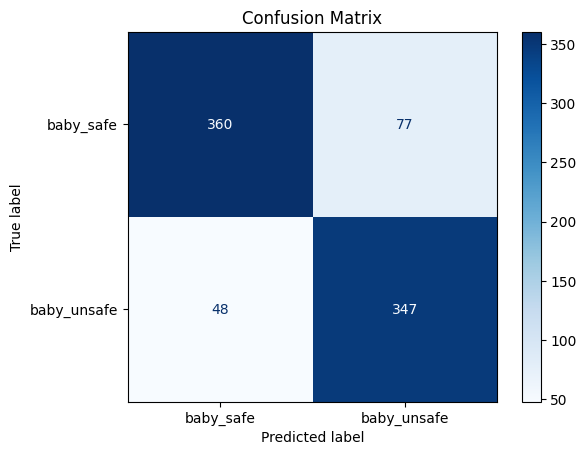

In [11]:
param_dist = {
    'n_estimators': randint(100, 500), # Numero di alberi da costruire
    'learning_rate': uniform(0.01, 0.3), # Passo di apprendimento
    'max_depth': randint(3, 10), # Profondità massima di un albero
    'subsample': uniform(0.6, 0.4), # Frazione di campioni da usare per l'addestramento
    'colsample_bytree': uniform(0.6, 0.4), # Frazione di feature da usare per la costruzione di ogni albero
    'gamma': uniform(0, 0.5) # Riduzione minima della perdita richiesta per fare un'ulteriore partizione
    }
best_params_xgbc = clf.optimize_model(xgbc_1, param_dist,verbose=False)
xgbc_2 = XGBClassifier(**best_params_xgbc)
results_xgbc_2 = clf.evaluation_pipeline(xgbc_2,verbose=True)

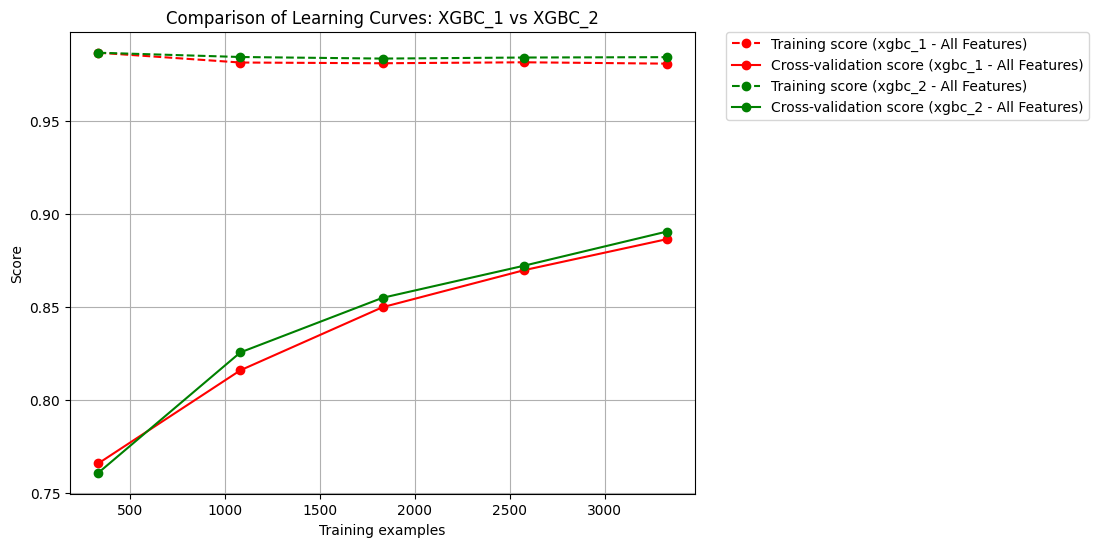

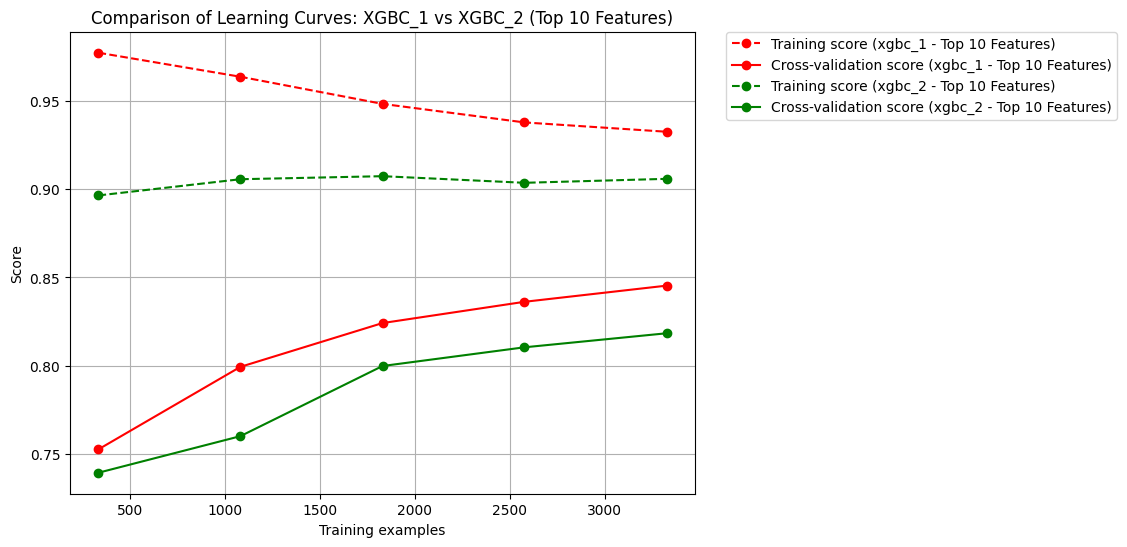

In [12]:
# Graph 1:
data_to_plot_1 = [
    (results_xgbc_1['all_features']['model'], "xgbc_1 - All Features", results_xgbc_1['all_features']['X'], results_xgbc_1['all_features']['y']),
    (results_xgbc_2['all_features']['model'], "xgbc_2 - All Features", results_xgbc_2['all_features']['X'], results_xgbc_2['all_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_1,
    title="Comparison of Learning Curves: XGBC_1 vs XGBC_2"
)

# Graph 2:
data_to_plot_2 = [
    (results_xgbc_1['top_10_features']['model'], "xgbc_1 - Top 10 Features", results_xgbc_1['top_10_features']['X'], results_xgbc_1['top_10_features']['y']),
    (results_rf2['top_10_features']['model'], "xgbc_2 - Top 10 Features", results_xgbc_2['top_10_features']['X'], results_xgbc_2['top_10_features']['y'])
]

clf.plot_learning_curve_comparison(
    data_sets=data_to_plot_2,
    title="Comparison of Learning Curves: XGBC_1 vs XGBC_2 (Top 10 Features)"
)

# 5) Bagging

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


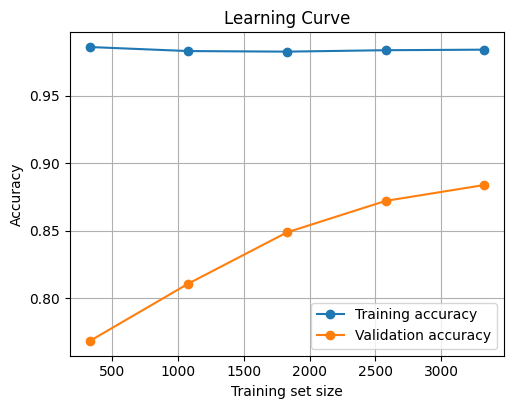


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.92      0.87      0.89       437
 baby_unsafe       0.86      0.91      0.89       395

    accuracy                           0.89       832
   macro avg       0.89      0.89      0.89       832
weighted avg       0.89      0.89      0.89       832

Confusion matrix---------------------------------------


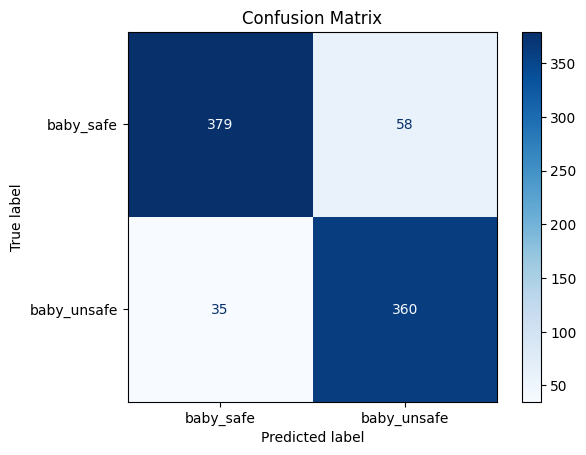

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
base_clf = DecisionTreeClassifier(random_state=42)
bagging_1, results_bag_1 = clf.bagging(base_clf=base_clf,verbose=True)


Start random search...


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
745 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/base.py", line 471, in _validate_params
    validate_para


Random Search Results:
Best parameters found:  {'bootstrap_features': True, 'estimator__max_depth': 22, 'estimator__min_samples_split': 3, 'max_features': np.float64(0.7541636490697388), 'max_samples': np.float64(0.7952905884189387), 'n_estimators': 372}
Best mean cross-validation accuracy:  0.8758265031949243
------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


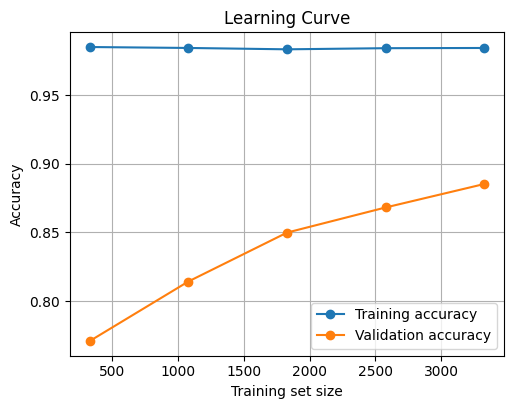


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.93      0.87      0.90       437
 baby_unsafe       0.87      0.92      0.89       395

    accuracy                           0.90       832
   macro avg       0.90      0.90      0.90       832
weighted avg       0.90      0.90      0.90       832

Confusion matrix---------------------------------------


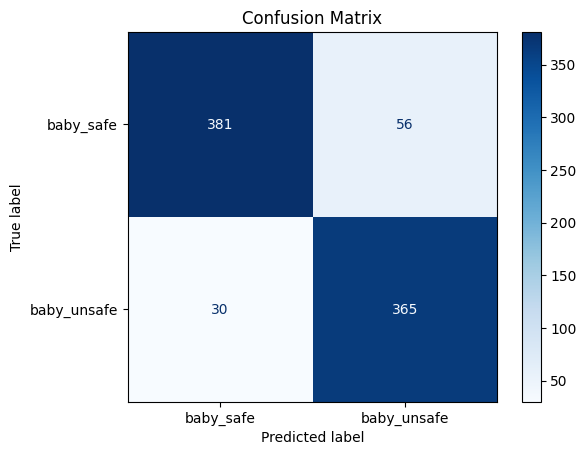

In [14]:
# Definisci il dizionario dei parametri per la ricerca casuale
param_grid = {
    'n_estimators': randint(100, 500),
    'max_samples': uniform(0.5, 1),
    'max_features': uniform(0.5, 1),
    'bootstrap_features': [True, False],
    'estimator__max_depth': randint(1,30),
    'estimator__min_samples_split': randint(2, 20)
}

best_params_bagging = clf.optimize_model(model=bagging_1, param_grid=param_grid, verbose=False)

dt_params = {
    'max_depth': best_params_bagging.pop('estimator__max_depth'),
    'min_samples_split': best_params_bagging.pop('estimator__min_samples_split')
}

bagging_2 = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42,**dt_params),
    **best_params_bagging)

results_bagging_2 = clf.evaluation_pipeline(bagging_2,verbose=True)

# 6) Ensamble

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

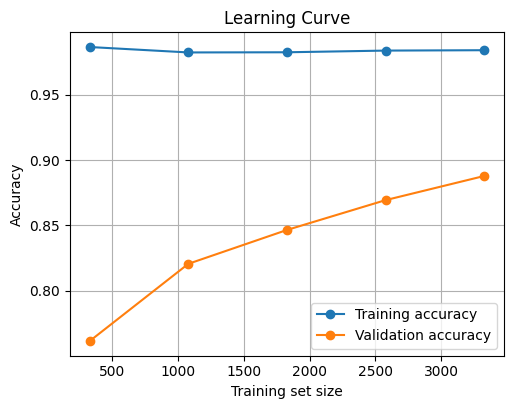


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.92      0.88      0.90       437
 baby_unsafe       0.87      0.92      0.89       395

    accuracy                           0.90       832
   macro avg       0.90      0.90      0.90       832
weighted avg       0.90      0.90      0.90       832

Confusion matrix---------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


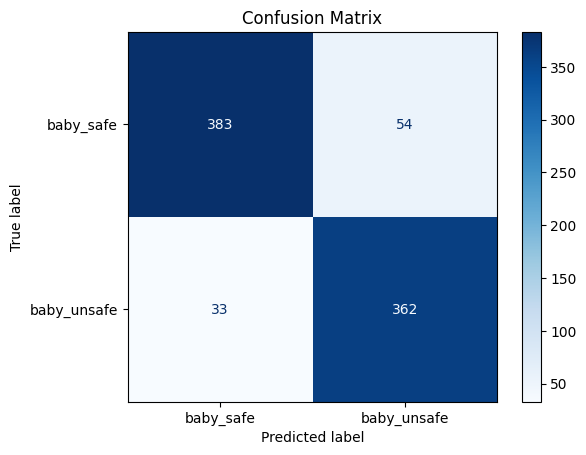

In [15]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', lr_2), ('rf', random_forest_2), ('xgb', xgbc_2), ('bagging', bagging_2)],
    voting='soft'  # 'hard' per la maggioranza, 'soft' per le probabilità
)

results_voting_soft = clf.evaluation_pipeline(voting_clf_soft,verbose=True,is_ensemble=True)

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


------------------------------------------------------------------------------------------
-----------------------ENSEMBLE MODEL EVALUATION ON TOP 10 FEATURES-----------------------
------------------------------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

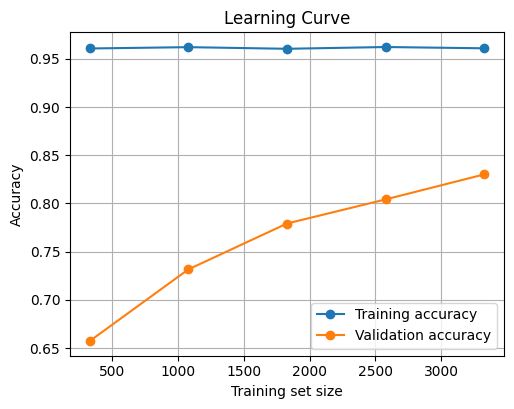


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.79      0.83       437
 baby_unsafe       0.79      0.88      0.83       395

    accuracy                           0.83       832
   macro avg       0.83      0.83      0.83       832
weighted avg       0.84      0.83      0.83       832

Confusion matrix---------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


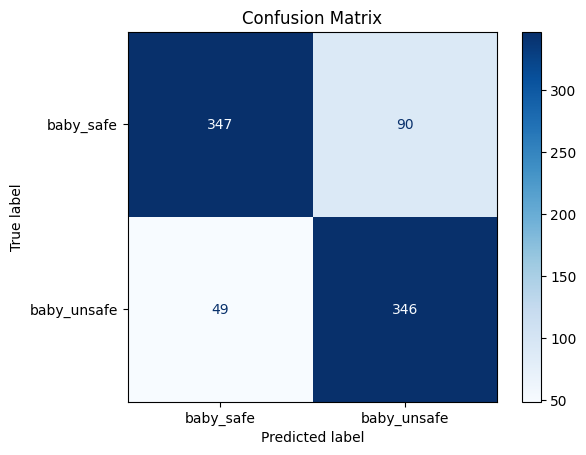

In [16]:
top_10_features_idx = results_lr_2['top_10_features']['top_features_idx']

results_voting_soft = clf.ensemble_on_top_features(
    ensemble_clf=voting_clf_soft,
    top_features_idx=top_10_features_idx,
    verbose=True
)

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (pena

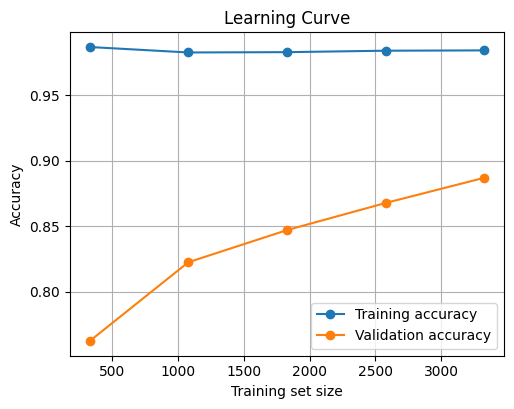


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.92      0.87      0.90       437
 baby_unsafe       0.87      0.92      0.89       395

    accuracy                           0.89       832
   macro avg       0.89      0.90      0.89       832
weighted avg       0.90      0.89      0.89       832

Confusion matrix---------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


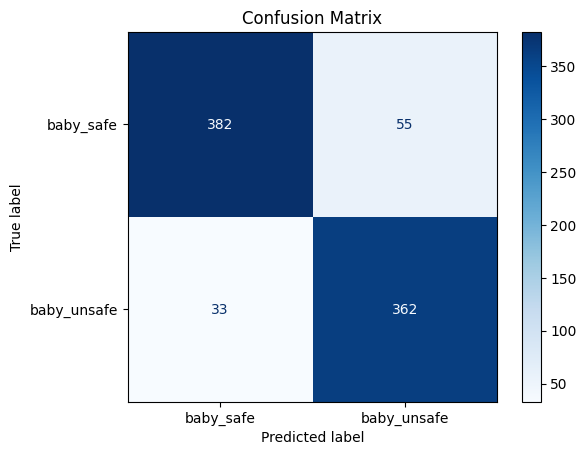

In [17]:
from sklearn.calibration import CalibratedClassifierCV
# Calibrazione dei modelli per migliorare le probabilità
# Per la Regressione Logistica, la calibrazione è solitamente meno necessaria, ma è una buona pratica
calibrated_lr = CalibratedClassifierCV(lr_2, method='isotonic', cv=5)

# Per il Random Forest e altri modelli basati su alberi, la calibrazione è molto utile
calibrated_rf = CalibratedClassifierCV(random_forest_2, method='isotonic', cv=5)

# Anche per XGBoost, la calibrazione può aiutare
calibrated_xgbc = CalibratedClassifierCV(xgbc_2, method='isotonic', cv=5)

calibrated_bagging = CalibratedClassifierCV(bagging_2, method='isotonic', cv=5)

# Creazione del VotingClassifier utilizzando i modelli calibrati
# Nota: La calibrazione richiede 'voting='soft' per funzionare correttamente
voting_clf_soft_calibrated = VotingClassifier(
    estimators=[
        ('lr_calibrated', calibrated_lr),
        ('rf_calibrated', calibrated_rf),
        ('xgbc_calibrated', calibrated_xgbc),
        ('bagging_calibrated', calibrated_bagging)
    ],
    voting='soft'
)
results_voting_soft_calibrated = clf.evaluation_pipeline(voting_clf_soft,verbose=True,is_ensemble=True)

------------------------------------------------------------------------------------------
-----------------------ENSEMBLE MODEL EVALUATION ON TOP 10 FEATURES-----------------------
------------------------------------------------------------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

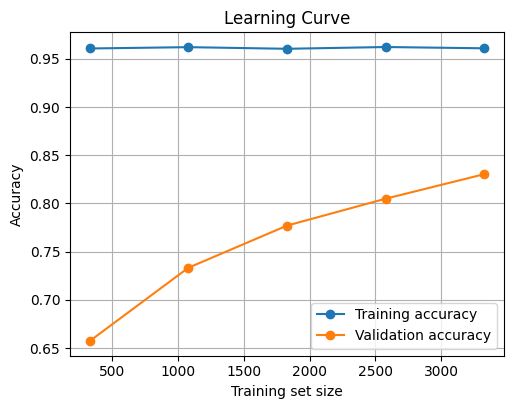


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.79      0.83       437
 baby_unsafe       0.79      0.87      0.83       395

    accuracy                           0.83       832
   macro avg       0.83      0.83      0.83       832
weighted avg       0.83      0.83      0.83       832

Confusion matrix---------------------------------------


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


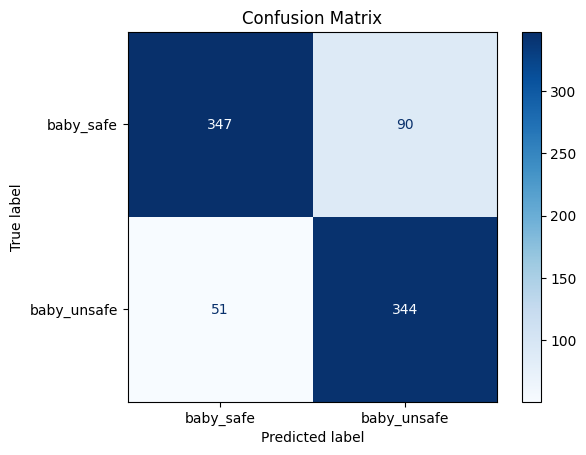

{'top_10_features': {'model': VotingClassifier(estimators=[('lr',
                                LogisticRegression(C=np.float64(592.9735077555503),
                                                   l1_ratio=0.9, penalty='l1',
                                                   solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=17,
                                                       max_features=0.5,
                                                       max_samples=np.float64(0.8473924665198522),
                                                       min_samples_leaf=2,
                                                       min_samples_split=7,
                                                       n_estimators=995)),
                               ('xgb',
                                XGBClassifier(base_score=None,...
            

In [18]:
top_10_features_idx = results_lr_2['top_10_features']['top_features_idx']

clf.ensemble_on_top_features(
    ensemble_clf=voting_clf_soft,
    top_features_idx=top_10_features_idx,
    verbose=True
)

# Compare all the models


/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/util

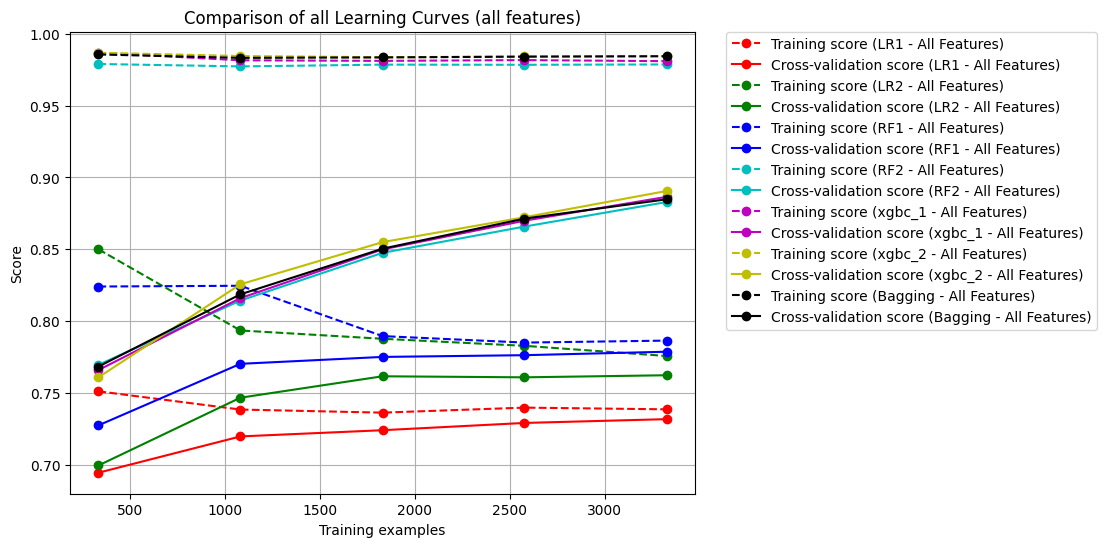

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/util

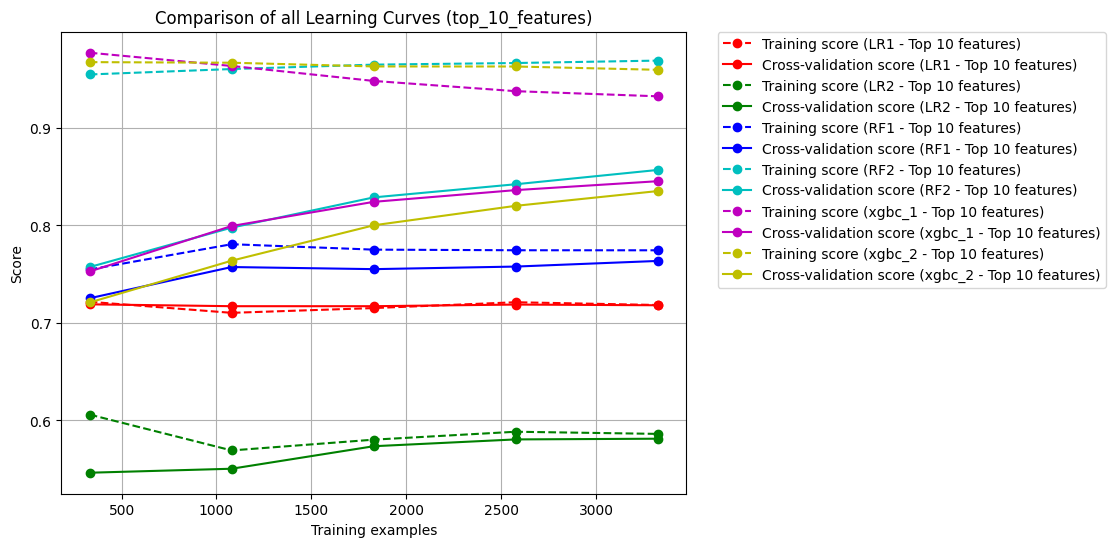

/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/sklearn/util

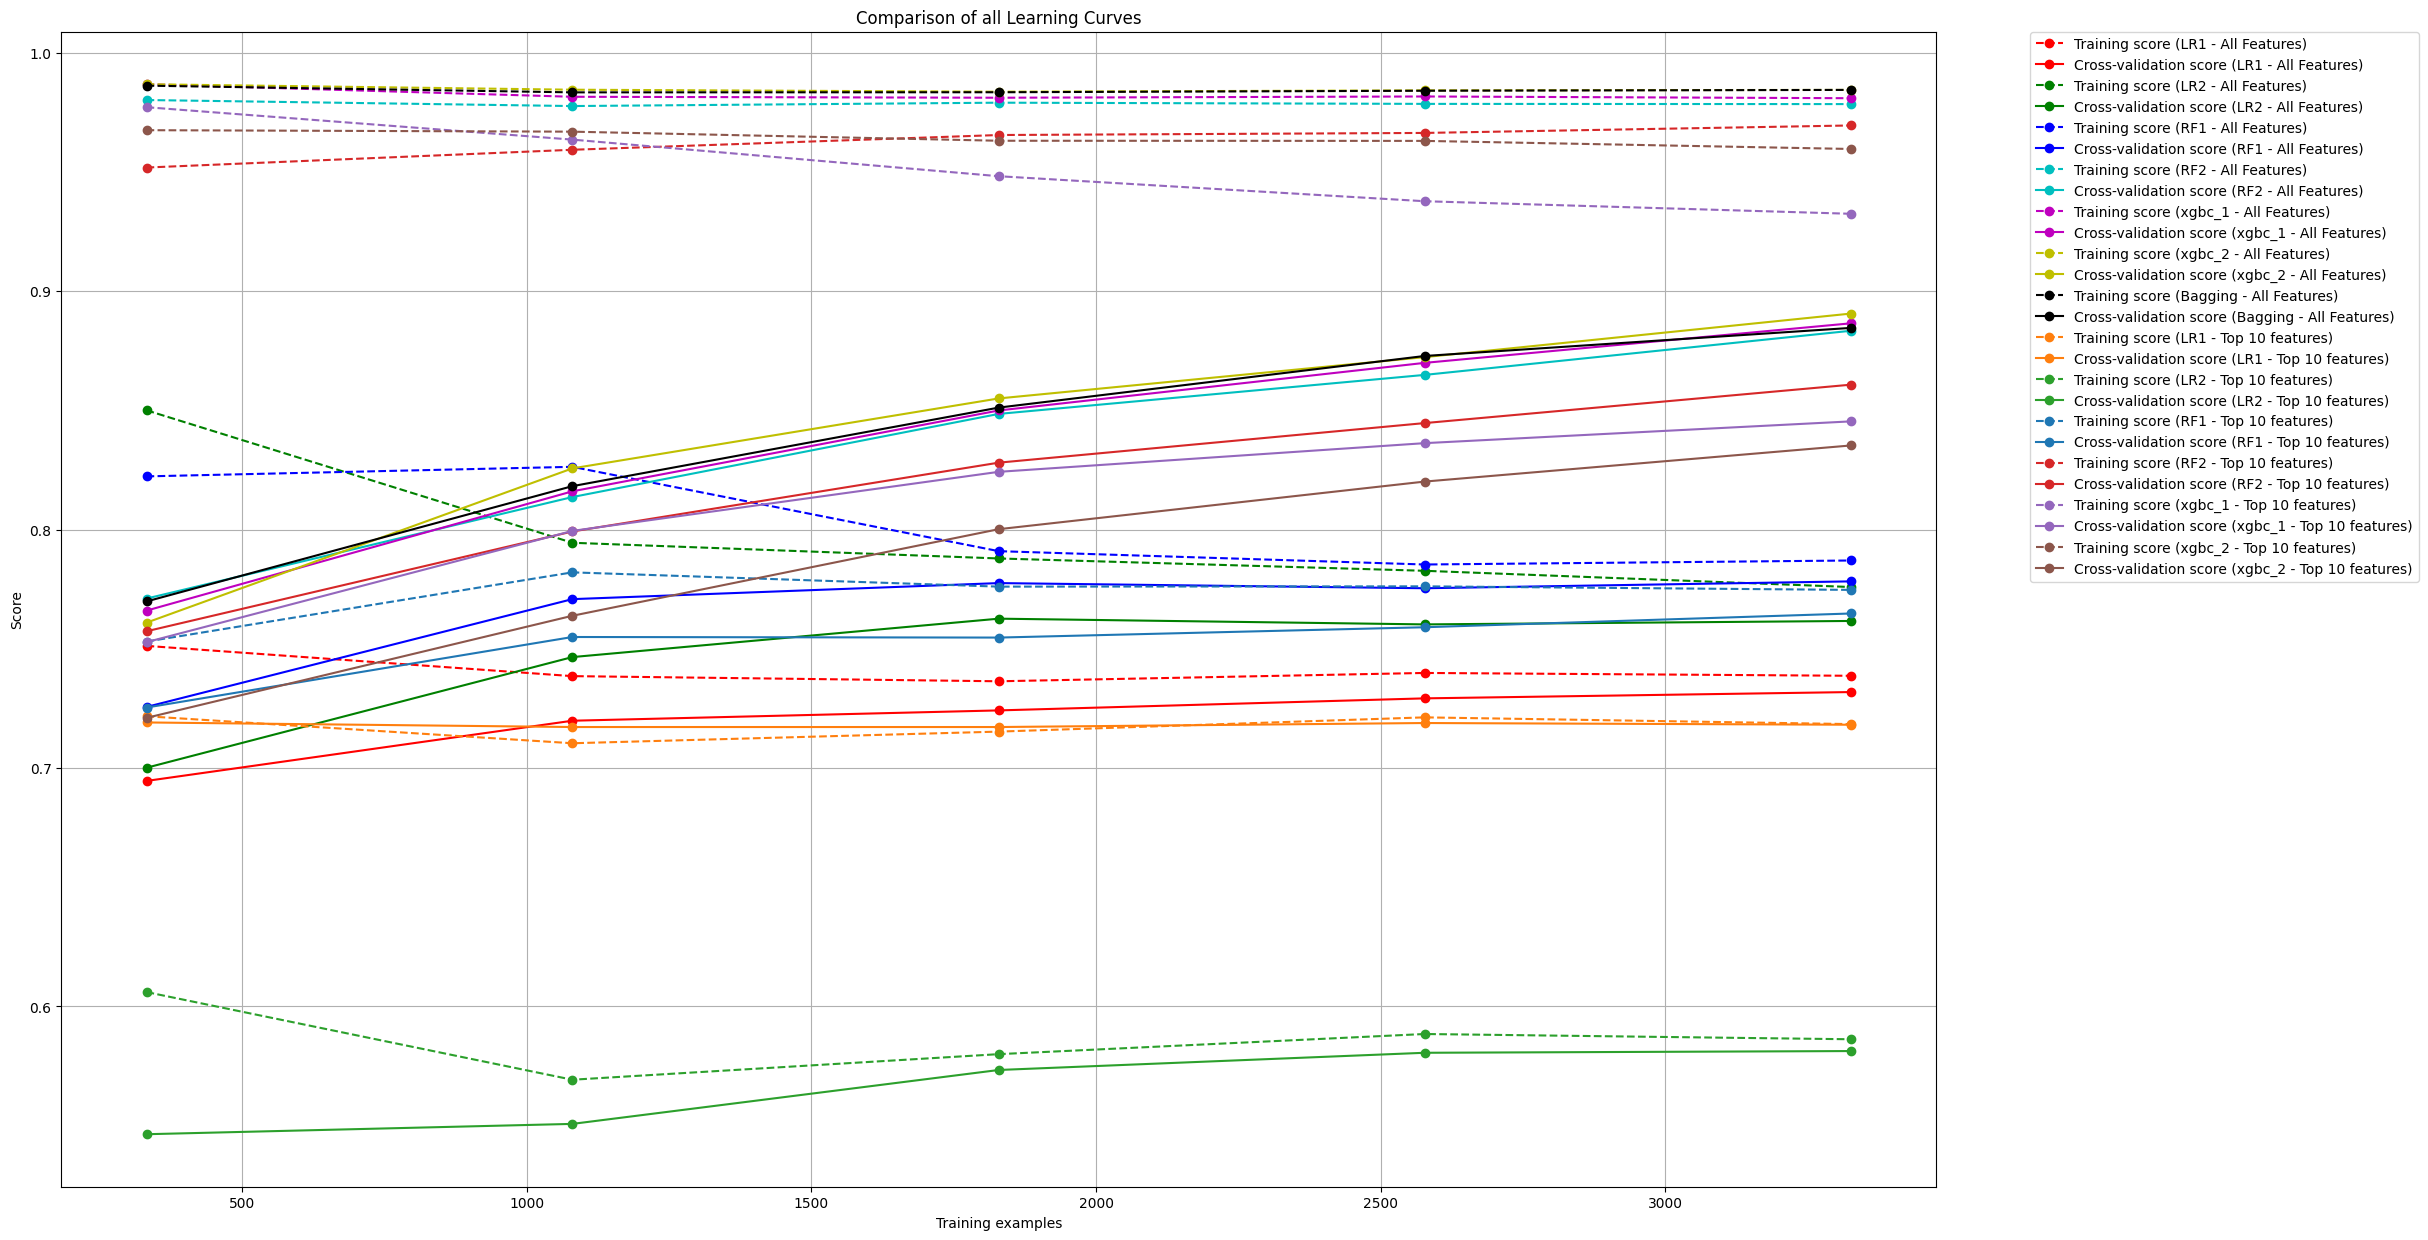

In [19]:
data_to_plot_1 = [
        (results_lr_1['all_features']['model'], "LR1 - All Features", results_lr_1['all_features']['X'], results_lr_1['all_features']['y']),
        (results_lr_2['all_features']['model'], "LR2 - All Features", results_lr_2['all_features']['X'], results_lr_2['all_features']['y']),
        (results_rf1['all_features']['model'], "RF1 - All Features", results_rf1['all_features']['X'], results_rf1['all_features']['y']),
        (results_rf2['all_features']['model'], "RF2 - All Features", results_rf2['all_features']['X'], results_rf2['all_features']['y']),
        (results_xgbc_1['all_features']['model'], "xgbc_1 - All Features", results_xgbc_1['all_features']['X'], results_xgbc_1['all_features']['y']),
        (results_xgbc_2['all_features']['model'], "xgbc_2 - All Features", results_xgbc_2['all_features']['X'], results_xgbc_2['all_features']['y']),
        (results_bagging_2['all_features']['model'], "Bagging - All Features", results_bagging_2['all_features']['X'], results_bagging_2['all_features']['y'])
]

data_to_plot_2 = [
        (results_lr_1['top_10_features']['model'], "LR1 - Top 10 features", results_lr_1['top_10_features']['X'], results_lr_1['top_10_features']['y']),
        (results_lr_2['top_10_features']['model'], "LR2 - Top 10 features", results_lr_2['top_10_features']['X'], results_lr_2['top_10_features']['y']),
        (results_rf1['top_10_features']['model'], "RF1 - Top 10 features", results_rf1['top_10_features']['X'], results_rf1['top_10_features']['y']),
        (results_rf2['top_10_features']['model'], "RF2 - Top 10 features", results_rf2['top_10_features']['X'], results_rf2['top_10_features']['y']),
        (results_xgbc_1['top_10_features']['model'], "xgbc_1 - Top 10 features", results_xgbc_1['top_10_features']['X'], results_xgbc_1['top_10_features']['y']),
        (results_xgbc_2['top_10_features']['model'], "xgbc_2 - Top 10 features", results_xgbc_2['top_10_features']['X'], results_xgbc_2['top_10_features']['y'])
]

clf.plot_learning_curve_comparison(data_sets=data_to_plot_1, title="Comparison of all Learning Curves (all features)"
)
clf.plot_learning_curve_comparison(data_sets=data_to_plot_2, title="Comparison of all Learning Curves (top_10_features)"
)

clf.plot_learning_curve_comparison(data_sets=data_to_plot_1+ data_to_plot_2, title="Comparison of all Learning Curves",figsize=(30,15)
)

# General Model Analysis and Conclusion 📊

Our comprehensive analysis of various classification models has provided clear insights into their performance with both the full feature set and the top 10 most relevant features.

Model	Performance with All Features	Performance with Top 10 Features
Logistic Regression	Good baseline.	Slight performance drop, showing the value of additional features.
Random Forest	Excellent.	Excellent.
XGBoost	Excellent, often matching or slightly surpassing Random Forest.	Excellent, demonstrating robustness with fewer features.
BaggingClassifier	Excellent.	N/A.
Ensemble (VotingClassifier)	Excellent performance, with a minor improvement over the best individual model.	Excellent performance, with a minor improvement over the best individual model.
Best Individual Models

Most Powerful Model: XGBoost emerged as the strongest individual classifier. It is a robust, efficient, and highly predictive model that performs consistently well on both the full and reduced feature sets.

**Most Efficient Model: The Random Forest is a close second. It offers excellent performance with less implementation complexity and great stability.** While XGBoost is marginally better, Random Forest remains a reliable and powerful choice.

The Overall Best Model: The Ensemble

**The absolute best model is the VotingClassifier** . While individual models like XGBoost were very strong, the ensemble's ability to combine their strengths and compensate for their weaknesses led to a more robust and accurate final prediction.

# Save Notebook

In [20]:
os.environ["PATH"] = "/Library/TeX/texbin:" + os.environ["PATH"]
save_as_pdf(ipynbname.path())

[NbConvertApp] Converting notebook /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/classifier_parameter.ipynb to pdf
[NbConvertApp] Support files will be in /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/reports/classifier_parameter(2025-09-05)_files/
[NbConvertApp] Writing 1346448 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2255300 bytes to /Users/lorenzodimaio/Download/SIDS_revelation_project/full_pipeline/reports/classifier_parameter(2025-09-05).pdf
